In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from ipywidgets import interact, Dropdown


In [2]:
import pandas as pd

# Load the dataset from the Final Datasets folder
file_path = 'Final Datasets/N1_Cleaned_fueldata.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head


# Putting data into another variable
data_cleaned = data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972174 entries, 0 to 972173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PUBLISH_DATE         972174 non-null  object 
 1   TRADING_NAME         972174 non-null  object 
 2   BRAND_DESCRIPTION    972174 non-null  object 
 3   PRODUCT_DESCRIPTION  972174 non-null  object 
 4   PRODUCT_PRICE        972174 non-null  float64
 5   ADDRESS              972174 non-null  object 
 6   LOCATION             972174 non-null  object 
 7   POSTCODE             972174 non-null  int64  
 8   AREA_DESCRIPTION     972174 non-null  object 
 9   REGION_DESCRIPTION   972174 non-null  object 
 10  latitude             972174 non-null  float64
 11  longitude            972174 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 89.0+ MB


In [3]:
# Load the public holidays CSV file
file_path = 'Final Datasets/N7_public_holidays_2021_24.csv'
public_holidays_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
public_holidays_df.head(), public_holidays_df.columns

(   ID      Date     Holiday Name  \
 0   1  20210101   New Year's Day   
 1   2  20210126    Australia Day   
 2   3  20210308     Canberra Day   
 3   4  20210402      Good Friday   
 4   5  20210403  Easter Saturday   
 
                                          Information  \
 0  New Year's Day is the first day of the calenda...   
 1                    Always celebrated on 26 January   
 2  Held on the second Monday of March each year i...   
 3  Easter is celebrated with Good Friday and East...   
 4  Easter Saturday is between Good Friday and Eas...   
 
                                     More Information Jurisdiction  
 0  https://www.cmtedd.act.gov.au/communication/ho...          act  
 1  https://www.cmtedd.act.gov.au/communication/ho...          act  
 2  https://www.cmtedd.act.gov.au/communication/ho...          act  
 3  https://www.cmtedd.act.gov.au/communication/ho...          act  
 4  https://www.cmtedd.act.gov.au/communication/ho...          act  ,
 Index(['ID', 'Da

# Data Cleaning

In [4]:
# Convert 'Date' column to datetime format
public_holidays_df['Date'] = pd.to_datetime(public_holidays_df['Date'], format='%Y%m%d')

# Drop unnecessary columns ('ID', 'Information', 'More Information')
public_holidays_cleaned = public_holidays_df.drop(columns=['ID', 'Information', 'More Information'])

# If you want to filter by jurisdiction, do it here. For example, if you only want 'WA' (Western Australia)
public_holidays_cleaned = public_holidays_cleaned[public_holidays_cleaned['Jurisdiction'] == 'wa']

# Display the cleaned data to ensure it's ready for merging
print(public_holidays_cleaned.head())


          Date    Holiday Name Jurisdiction
100 2021-01-01  New Year's Day           wa
101 2021-01-26   Australia Day           wa
102 2021-03-01      Labour Day           wa
103 2021-04-02     Good Friday           wa
104 2021-04-05   Easter Monday           wa


In [ ]:
# Ensure 'PUBLISH_DATE' in fuel price data is in datetime format
data_cleaned['PUBLISH_DATE'] = pd.to_datetime(data_cleaned['PUBLISH_DATE'], format='%Y-%m-%d')

# Merge the public holidays with the fuel price data on 'PUBLISH_DATE' and 'Date'

merged_data = pd.merge(data_cleaned, public_holidays_cleaned, how='left', left_on='PUBLISH_DATE', right_on='Date')

# Drop unnecessary columns from the merged data if needed
merged_data.drop(columns=['Date', 'Jurisdiction'], inplace=True) 

# Display the new merged dataset to ensure it looks good
print(merged_data.head())


  PUBLISH_DATE            TRADING_NAME BRAND_DESCRIPTION PRODUCT_DESCRIPTION  \
0   2020-01-01          7-eleven ascot          7-eleven                 ULP   
1   2020-01-01       7-eleven balcatta          7-eleven                 ULP   
2   2020-01-01          7-eleven balga          7-eleven                 ULP   
3   2020-01-01  7-eleven banksia grove          7-eleven                 ULP   
4   2020-01-01     7-eleven bassendean          7-eleven                 ULP   

   PRODUCT_PRICE                 ADDRESS       LOCATION  POSTCODE  \
0          156.5   194 Great Eastern Hwy          ASCOT      6104   
1          153.9         174 Balcatta Rd       BALCATTA      6021   
2          157.5         102 Princess Rd          BALGA      6061   
3          157.5  1/300 Joseph Banks Bvd  BANKSIA GROVE      6031   
4          157.5      302-318 Collier Rd     BASSENDEAN      6054   

  AREA_DESCRIPTION REGION_DESCRIPTION   latitude   longitude Holiday Name  
0   South of River          

In [6]:
# Ensure the 'Date' in public holidays is also in datetime format, and drop the time component
public_holidays_cleaned['Date'] = pd.to_datetime(public_holidays_cleaned['Date'], format='%Y%m%d')

# Verify if both are correctly formatted
print(public_holidays_cleaned['Date'].head(), data_cleaned['PUBLISH_DATE'].head())


100   2021-01-01
101   2021-01-26
102   2021-03-01
103   2021-04-02
104   2021-04-05
Name: Date, dtype: datetime64[ns] 0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: PUBLISH_DATE, dtype: datetime64[ns]


In [7]:
# Check how many matches there are
matches = merged_data[merged_data['Holiday Name'].notna()]
print(f"Number of matches: {len(matches)}")
print(matches.head())

Number of matches: 26059
       PUBLISH_DATE            TRADING_NAME BRAND_DESCRIPTION  \
201404   2021-01-01          7-eleven ascot          7-eleven   
201405   2021-01-01       7-eleven balcatta          7-eleven   
201406   2021-01-01          7-eleven balga          7-eleven   
201407   2021-01-01  7-eleven banksia grove          7-eleven   
201408   2021-01-01     7-eleven bassendean          7-eleven   

       PRODUCT_DESCRIPTION  PRODUCT_PRICE                 ADDRESS  \
201404                 ULP          127.9   194 Great Eastern Hwy   
201405                 ULP          127.7         174 Balcatta Rd   
201406                 ULP          127.9         102 Princess Rd   
201407                 ULP          127.9  1/300 Joseph Banks Bvd   
201408                 ULP          127.9      302-318 Collier Rd   

             LOCATION  POSTCODE AREA_DESCRIPTION REGION_DESCRIPTION  \
201404          ASCOT      6104   South of River              metro   
201405       BALCATTA      

# 	Hypothesis: Public Holidays have higher fuel prices – Accepted

Average price on public holidays: 164.11 cents per litre
Average price on non-public holidays: 161.73 cents per litre


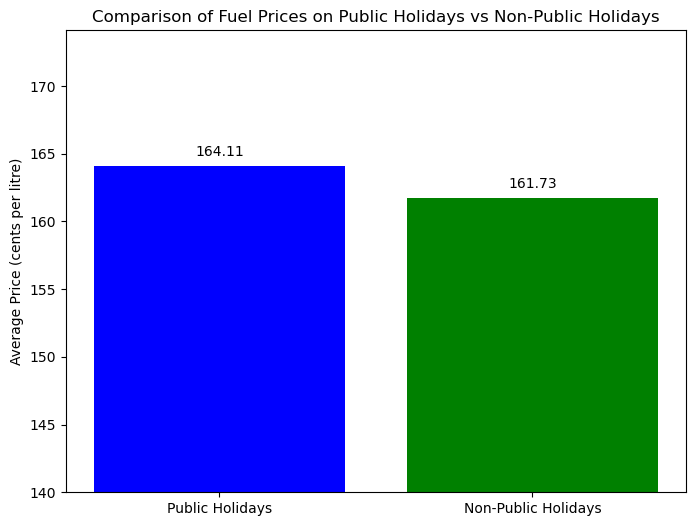

In [8]:

# Separate data into public holidays and non-public holidays
holiday_prices = merged_data[merged_data['Holiday Name'].notna()]
non_holiday_prices = merged_data[merged_data['Holiday Name'].isna()]

#  Calculate the average price for public holidays and non-public holidays
average_holiday_price = holiday_prices['PRODUCT_PRICE'].mean()
average_non_holiday_price = non_holiday_prices['PRODUCT_PRICE'].mean()

print(f"Average price on public holidays: {average_holiday_price:.2f} cents per litre")
print(f"Average price on non-public holidays: {average_non_holiday_price:.2f} cents per litre")

# Visualize the comparison using a bar chart with custom y-limits and labels
labels = ['Public Holidays', 'Non-Public Holidays']
average_prices = [average_holiday_price, average_non_holiday_price]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, average_prices, color=['blue', 'green'])

# Add average price labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

# Set the y-axis limit to start from 140 to emphasize differences
plt.ylim(140, max(average_prices) + 10)
plt.ylabel('Average Price (cents per litre)')
plt.title('Comparison of Fuel Prices on Public Holidays vs Non-Public Holidays')
plt.show()


In [9]:
# 'PUBLISH_DATE' column is in datetime format
merged_data['PUBLISH_DATE'] = pd.to_datetime(merged_data['PUBLISH_DATE'], format='%Y-%m-%d')

# Extract the year from the 'PUBLISH_DATE' column and create a new 'YEAR' column
merged_data['YEAR'] = merged_data['PUBLISH_DATE'].dt.year

# Filter out rows with no holiday name (non-public holidays)
holidays_data = merged_data[merged_data['Holiday Name'].notna()]

# Group by holiday and year, and calculate the average price for each holiday per year
holiday_yearly_avg = holidays_data.groupby(['Holiday Name', 'YEAR'])['PRODUCT_PRICE'].mean().reset_index()

# Pivot the data to prepare it for plotting (years as columns)
holiday_pivot = holiday_yearly_avg.pivot(index='Holiday Name', columns='YEAR', values='PRODUCT_PRICE')


<Figure size 1200x800 with 0 Axes>

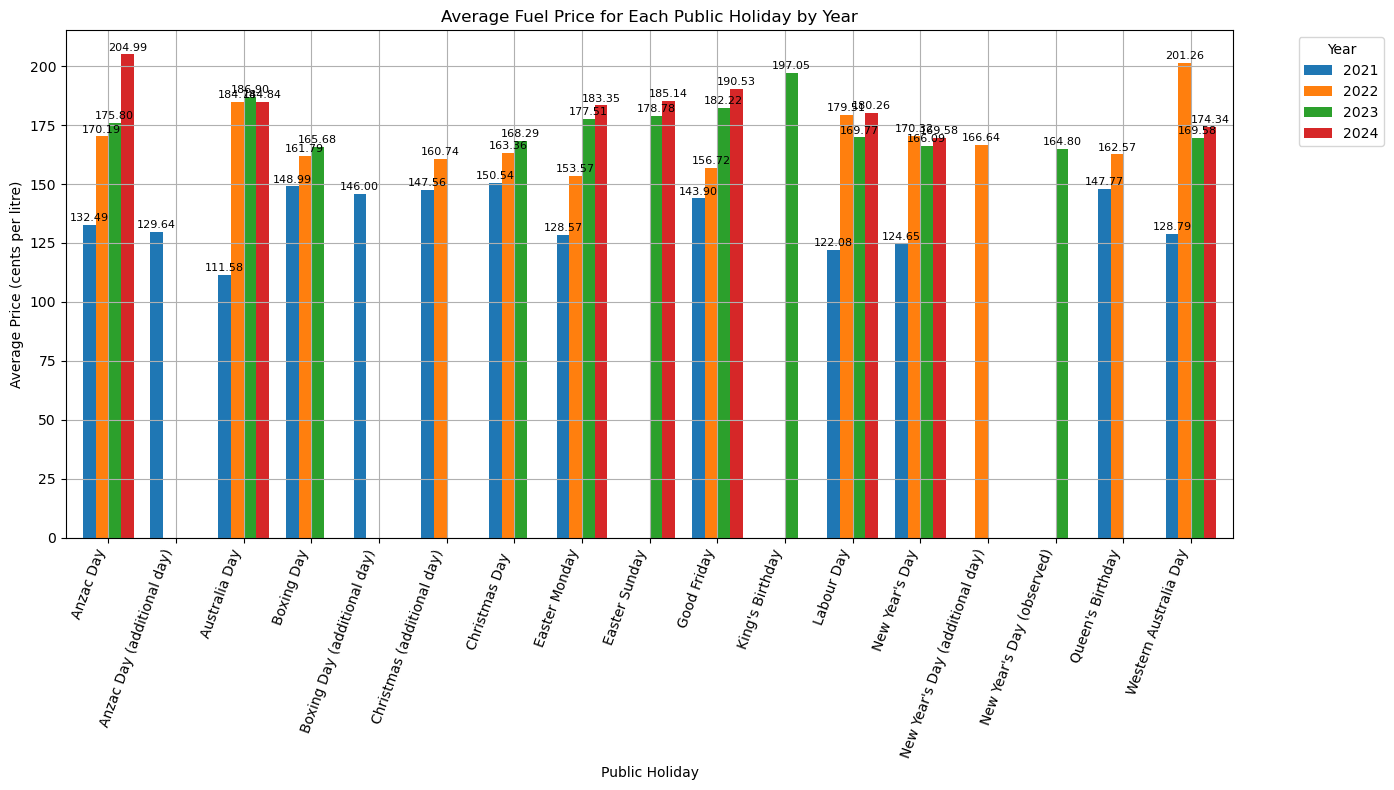

In [10]:

# Plot the data
plt.figure(figsize=(12, 8))
ax = holiday_pivot.plot(kind='bar', figsize=(14, 8), width=0.75)

# Adjust the placement and rotation of x-axis labels
plt.title('Average Fuel Price for Each Public Holiday by Year')
plt.xlabel('Public Holiday')
plt.ylabel('Average Price (cents per litre)')
plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels at a sharper angle
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on top of specific bars (only for max values or certain bars)
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with a height
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Adjust layout and grid
plt.tight_layout()
plt.grid(True)

# Display the plot
plt.show()


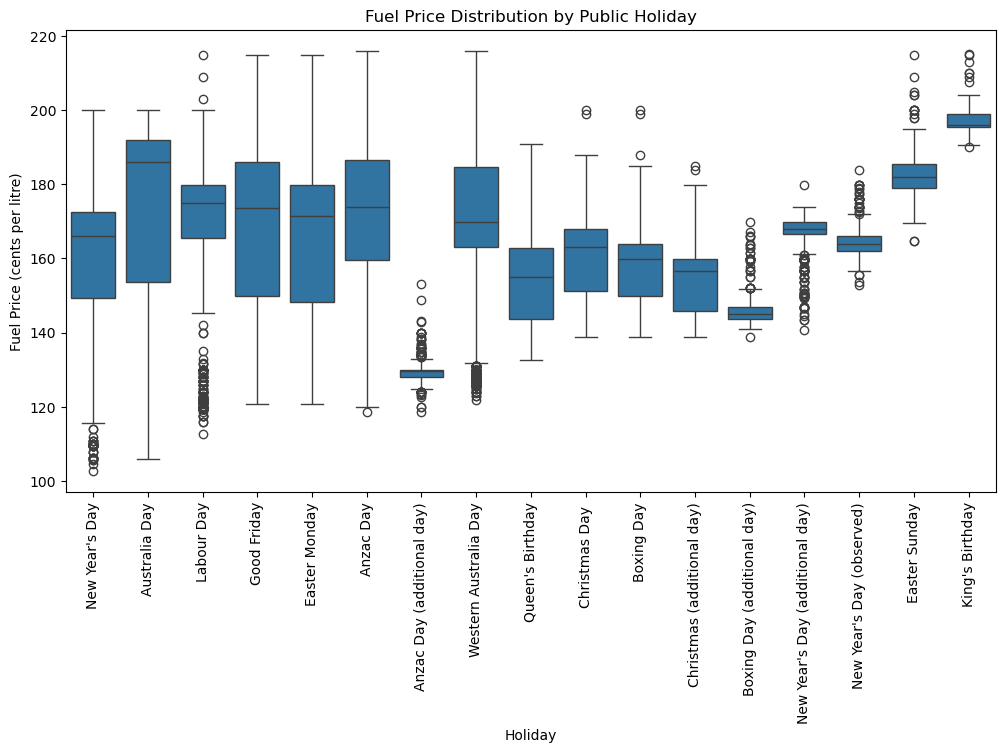

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday Name', y='PRODUCT_PRICE', data=merged_data)
plt.xticks(rotation=90)
plt.xlabel('Holiday')
plt.ylabel('Fuel Price (cents per litre)')
plt.title('Fuel Price Distribution by Public Holiday')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24728\1490014762.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(holiday_prices['PRODUCT_PRICE'], label='Public Holidays', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24728\1490014762.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_holiday_prices['PRODUCT_PRICE'], label='Non-Public Holidays', shade=True)


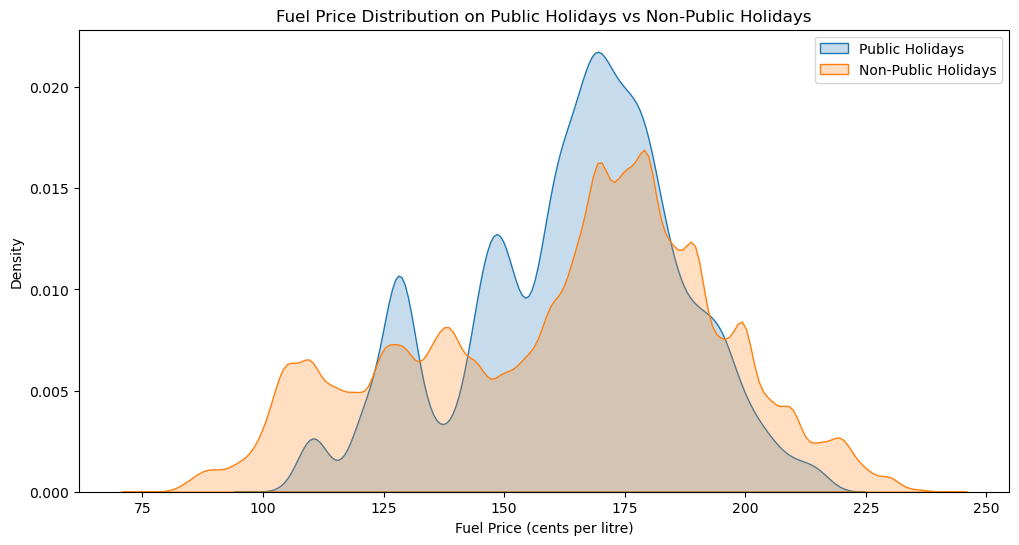

In [12]:
plt.figure(figsize=(12, 6))
sns.kdeplot(holiday_prices['PRODUCT_PRICE'], label='Public Holidays', shade=True)
sns.kdeplot(non_holiday_prices['PRODUCT_PRICE'], label='Non-Public Holidays', shade=True)
plt.xlabel('Fuel Price (cents per litre)')
plt.ylabel('Density')
plt.title('Fuel Price Distribution on Public Holidays vs Non-Public Holidays')
plt.legend()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


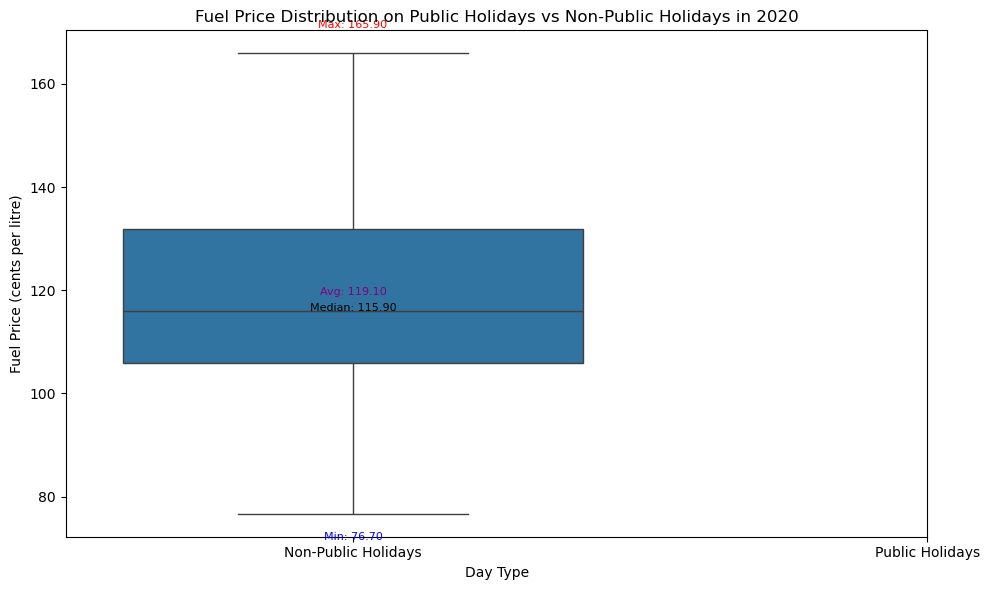

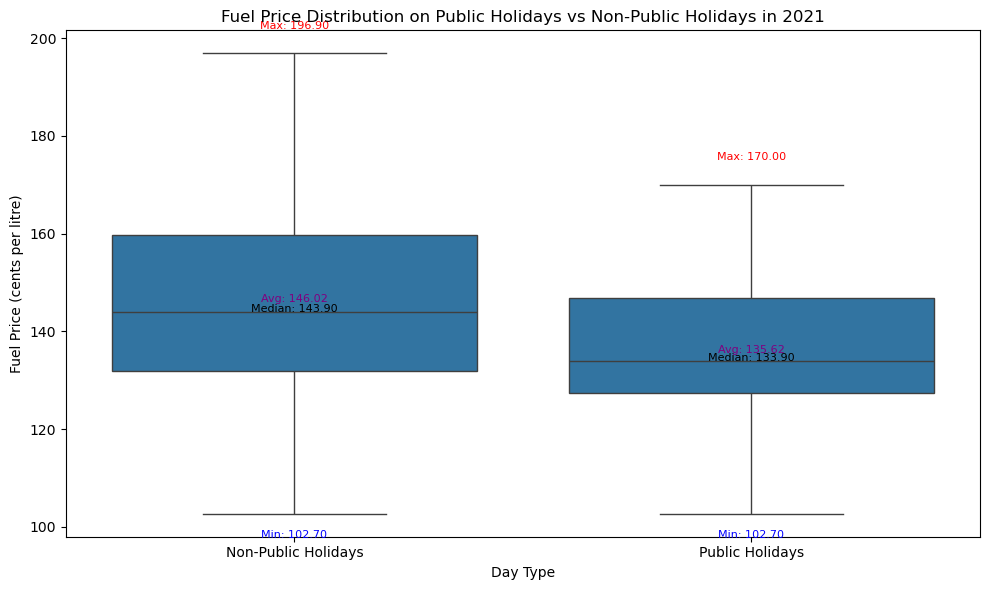

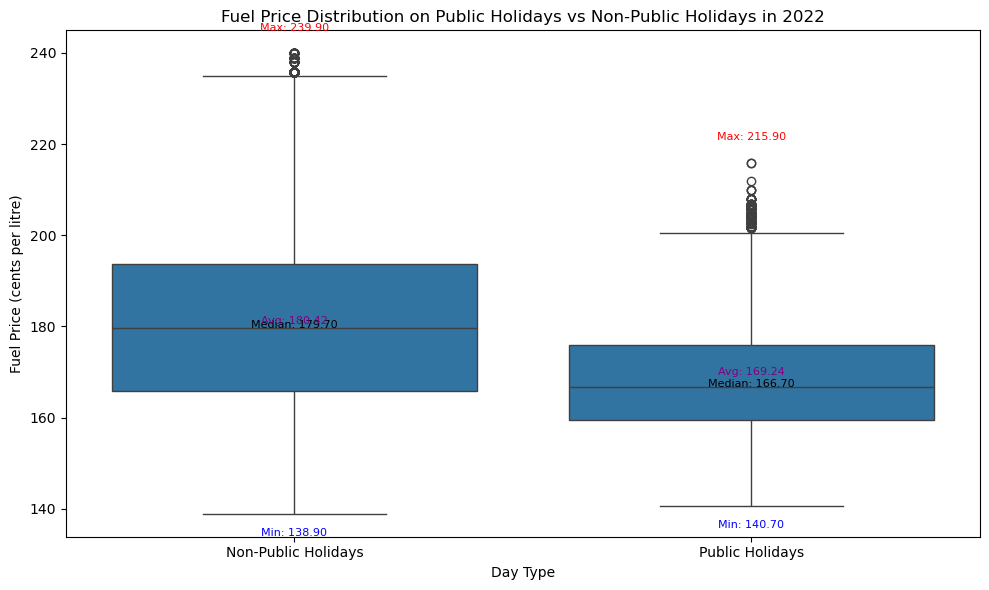

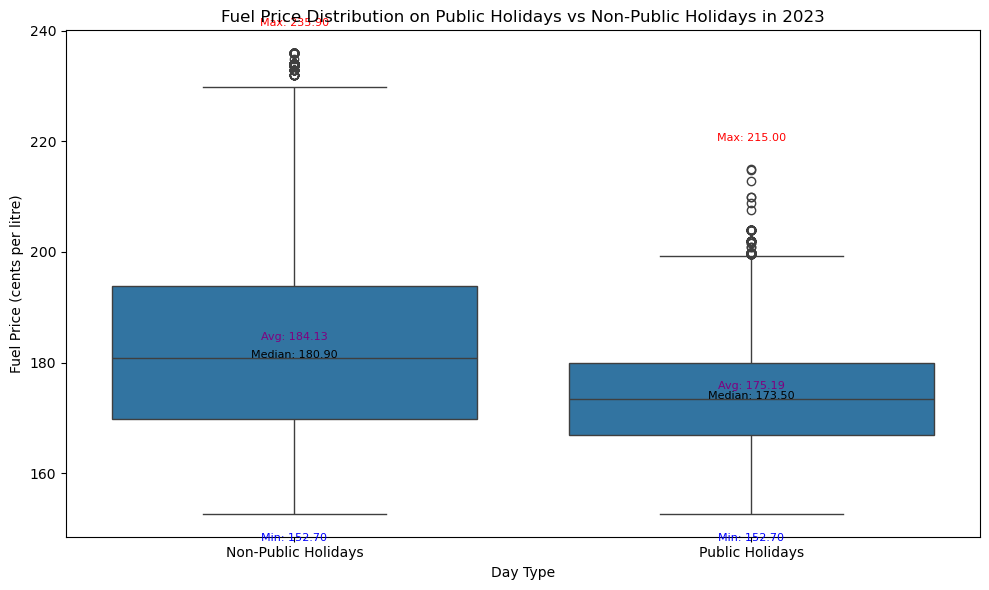

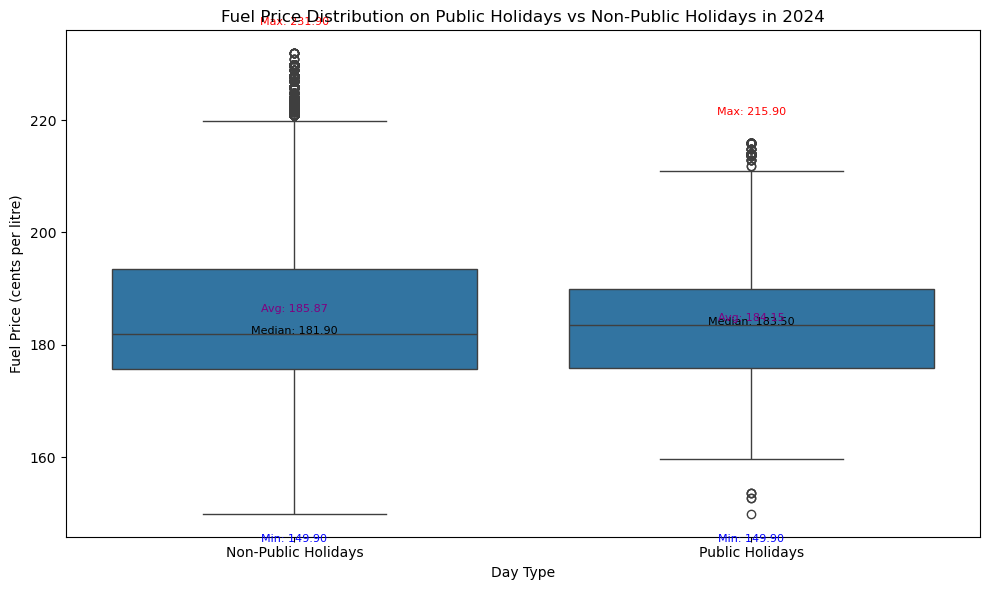

In [13]:
# List of years to loop through
years = merged_data['YEAR'].unique()

# Create box plots for each year
for year in years:
    # Filter data for the specific year
    year_data = merged_data[merged_data['YEAR'] == year]
    
    # Create the box plot
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x=year_data['Holiday Name'].notna(), y=year_data['PRODUCT_PRICE'])
    
    # Set custom x-ticks
    plt.xticks([0, 1], ['Non-Public Holidays', 'Public Holidays'])
    plt.xlabel('Day Type')
    plt.ylabel('Fuel Price (cents per litre)')
    plt.title(f'Fuel Price Distribution on Public Holidays vs Non-Public Holidays in {year}')
    
    # Add labels for min, max, median, and mean for each group
    for i, group in enumerate([False, True]):
        group_data = year_data[year_data['Holiday Name'].notna() == group]['PRODUCT_PRICE']
        
        # Calculate statistics
        min_val = group_data.min()
        max_val = group_data.max()
        median_val = group_data.median()
        mean_val = group_data.mean()

        # Add text labels to the plot
        plt.text(i, min_val - 5, f'Min: {min_val:.2f}', ha='center', color='blue', fontsize=8)
        plt.text(i, max_val + 5, f'Max: {max_val:.2f}', ha='center', color='red', fontsize=8)
        plt.text(i, median_val, f'Median: {median_val:.2f}', ha='center', color='black', fontsize=8)  # Changed to black
        plt.text(i, mean_val, f'Avg: {mean_val:.2f}', ha='center', color='purple', fontsize=8)

    # Display the plot
    plt.tight_layout()
    plt.show()

## 	Hypothesis : Prices start rising before or after Public Holiday - Rejected

In [14]:
# Shortlist public holidays with the highest average prices
holiday_avg_prices = merged_data.groupby('Holiday Name')['PRODUCT_PRICE'].mean().reset_index()
holiday_avg_prices = holiday_avg_prices.sort_values(by='PRODUCT_PRICE', ascending=False)

# Filter for the top 5 holidays with the highest fuel prices
top_holidays = holiday_avg_prices.head(5)['Holiday Name'].tolist()
print("Top Holidays Based on Fuel Price:", top_holidays)


Top Holidays Based on Fuel Price: ["King's Birthday", 'Easter Sunday', 'Anzac Day', 'Good Friday', 'Western Australia Day']


NameError: name 'mdates' is not defined

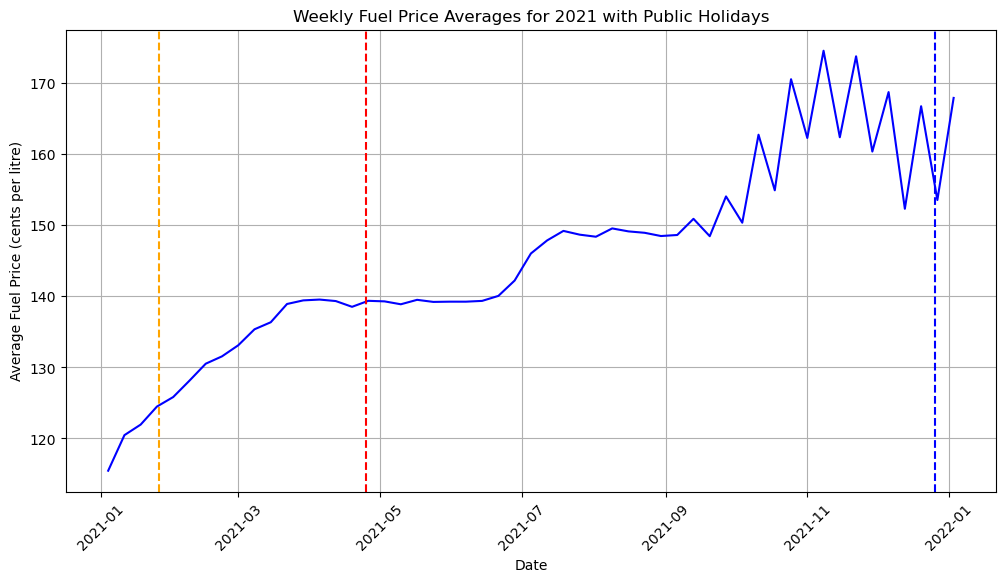

In [15]:

# Define a color map for each holiday
holiday_colors = {
    'Anzac Day': 'red',
    'Christmas Day': 'green',
    'Boxing Day': 'blue',
    'Easter Sunday': 'purple',
    'Australia Day': 'orange'
}

# Function to plot weekly averages for each year with vertical lines for multiple holidays
def plot_weekly_avg_with_holidays(year, holidays):
    # Filter data for the given year
    year_data = merged_data[merged_data['YEAR'] == year]
    
    # Resample data to weekly averages
    weekly_avg = year_data.resample('W-Mon', on='PUBLISH_DATE')['PRODUCT_PRICE'].mean()
    
    # Plot weekly averages
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_avg.index, weekly_avg, label=f'Weekly Average {year}', color='blue')
    
    # Add vertical lines for each public holiday with different colors
    for holiday in holidays:
        holiday_dates = merged_data[(merged_data['Holiday Name'] == holiday) & (merged_data['YEAR'] == year)]['PUBLISH_DATE'].unique()
        if len(holiday_dates) > 0:
            for holiday_date in holiday_dates:
                plt.axvline(x=holiday_date, color=holiday_colors[holiday], linestyle='--', label=holiday)
    
    # Customize plot
    plt.title(f'Weekly Fuel Price Averages for {year} with Public Holidays')
    plt.xlabel('Date')
    plt.ylabel('Average Fuel Price (cents per litre)')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Format x-axis dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    
    plt.tight_layout()
    plt.legend()
    plt.show()

# Shortlist of top 5 holidays based on fuel price impact
top_holidays = ['Anzac Day', 'Christmas Day', 'Boxing Day', 'Easter Sunday', 'Australia Day']

# Plot for each year
for year in [2021, 2022, 2023, 2024]:
    plot_weekly_avg_with_holidays(year, top_holidays)

C:\Users\User\AppData\Local\Temp\ipykernel_24728\4255484623.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_after_holiday_data['price_change'] = before_after_holiday_data['PRODUCT_PRICE'].pct_change() * 100


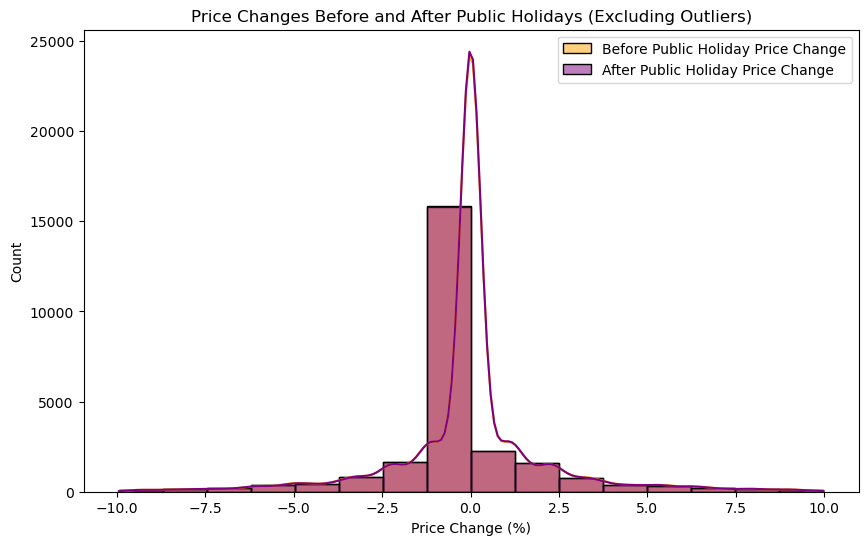

In [16]:
# Define a window around holidays (e.g., 3 days before and after)
window_days = 14

# Shift the 'Holiday Name' column to mark before and after holiday days
merged_data['is_before_holiday'] = merged_data['Holiday Name'].shift(-window_days).notna()
merged_data['is_after_holiday'] = merged_data['Holiday Name'].shift(window_days).notna()

# Filter for the window of days around holidays
before_after_holiday_data = merged_data[(merged_data['is_before_holiday']) | (merged_data['is_after_holiday'])]

# Remove outliers in price change (keep price change between -10% and 10%)
before_after_holiday_data['price_change'] = before_after_holiday_data['PRODUCT_PRICE'].pct_change() * 100
before_after_holiday_data = before_after_holiday_data[(before_after_holiday_data['price_change'] >= -10) & 
                                                     (before_after_holiday_data['price_change'] <= 10)]

# Compare price changes before and after holidays
before_holiday_changes = before_after_holiday_data[before_after_holiday_data['is_before_holiday']]['price_change']
after_holiday_changes = before_after_holiday_data[before_after_holiday_data['is_after_holiday']]['price_change']

# Plotting price changes before and after holidays (removing extreme outliers)
plt.figure(figsize=(10, 6))
sns.histplot(before_holiday_changes.dropna(), color='orange', label='Before Public Holiday Price Change', kde=True)
sns.histplot(after_holiday_changes.dropna(), color='purple', label='After Public Holiday Price Change', kde=True)
plt.legend()
plt.title('Price Changes Before and After Public Holidays (Excluding Outliers)')
plt.xlabel('Price Change (%)')
plt.show()


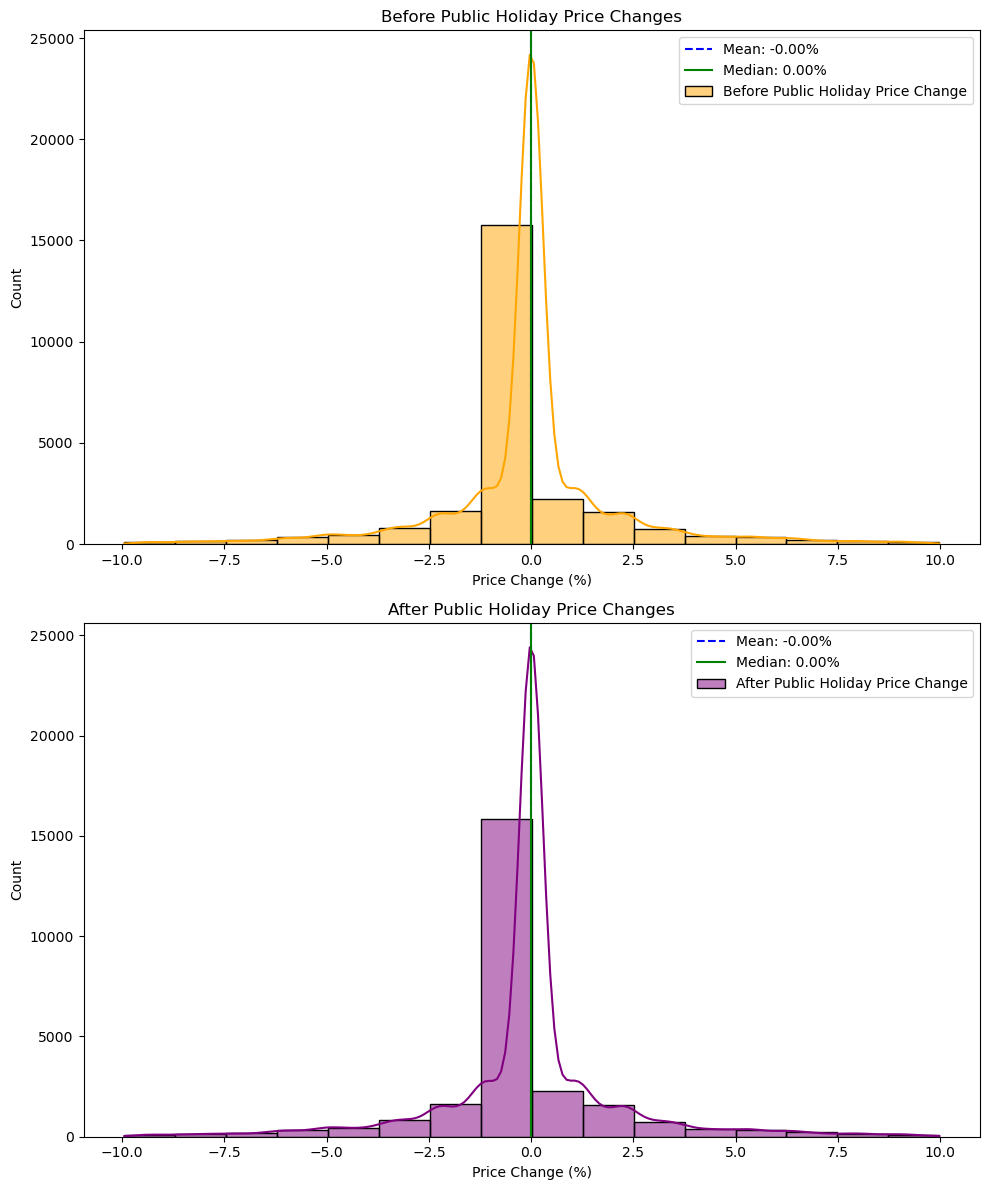

In [17]:

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot before public holiday price changes
sns.histplot(before_holiday_changes.dropna(), color='orange', label='Before Public Holiday Price Change', kde=True, ax=axes[0])
axes[0].set_title('Before Public Holiday Price Changes')
axes[0].set_xlabel('Price Change (%)')
axes[0].set_ylabel('Count')

# Label the key statistics for the 'before' plot
before_mean = before_holiday_changes.mean()
before_median = before_holiday_changes.median()
axes[0].axvline(before_mean, color='blue', linestyle='--', label=f'Mean: {before_mean:.2f}%')
axes[0].axvline(before_median, color='green', linestyle='-', label=f'Median: {before_median:.2f}%')

# Plot after public holiday price changes
sns.histplot(after_holiday_changes.dropna(), color='purple', label='After Public Holiday Price Change', kde=True, ax=axes[1])
axes[1].set_title('After Public Holiday Price Changes')
axes[1].set_xlabel('Price Change (%)')
axes[1].set_ylabel('Count')

# Label the key statistics for the 'after' plot
after_mean = after_holiday_changes.mean()
after_median = after_holiday_changes.median()
axes[1].axvline(after_mean, color='blue', linestyle='--', label=f'Mean: {after_mean:.2f}%')
axes[1].axvline(after_median, color='green', linestyle='-', label=f'Median: {after_median:.2f}%')

# Display legends for both plots
axes[0].legend()
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


Before Public Holidays:
The price changes are mostly concentrated around 0%, with a few small fluctuations.
The mean price change is very close to 0, indicating that there isn't a significant increase or decrease in prices leading up to the holidays.
There are minor negative price changes visible, but overall, prices remain fairly stable before public holidays.

After Public Holidays:
Similarly, the price changes after public holidays are also centered around 0%, indicating minimal changes.
The mean and median price changes after public holidays are still very close to 0%, suggesting no substantial drop or rise after the holiday.

In [18]:
# Function to filter and plot data around a selected holiday
def plot_weekly_comparison(holiday_name, data):
    plt.figure(figsize=(12, 6))
    plt.title(f"Fuel Prices Before and After {holiday_name}")
    plt.xlabel('Date')
    plt.ylabel('Average Price (cents per litre)')

    # Ensure the data is sorted by date
    data = data.sort_values('PUBLISH_DATE')

    years = data['YEAR'].unique()

    for year in years:
        # Filter the data for the specific holiday and year
        year_data = data[data['YEAR'] == year]

        # Get the holiday date for the current year
        try:
            holiday_date = year_data[year_data['Holiday Name'] == holiday_name]['PUBLISH_DATE'].iloc[0]

            # Filter data within two weeks before and after the holiday
            filtered_data = year_data[(year_data['PUBLISH_DATE'] >= holiday_date - pd.Timedelta(days=14)) &
                                      (year_data['PUBLISH_DATE'] <= holiday_date + pd.Timedelta(days=14))]

            # Plot the data for the specific holiday and year
            if not filtered_data.empty:
                plt.plot(filtered_data['PUBLISH_DATE'], filtered_data['PRODUCT_PRICE'], label=f"{holiday_name} {year}")

                # Add a vertical line for the holiday date
                plt.axvline(x=holiday_date, color='red', linestyle='--', label=f'Holiday Date {year}')
        except IndexError:
            print(f"No data found for {holiday_name} in {year}")

    plt.legend()
    plt.grid(True)
    plt.show()

# Function to update the plot based on the selected holiday
def update_plot(holiday_name):
    plot_weekly_comparison(holiday_name, merged_data)

# Create a dropdown widget for selecting holidays
holidays = merged_data['Holiday Name'].dropna().unique()
dropdown = widgets.Dropdown(options=holidays, description='Select Holiday:')
widgets.interactive(update_plot, holiday_name=dropdown)

interactive(children=(Dropdown(description='Select Holiday:', options=("New Year's Day", 'Australia Day', 'Lab…

In [19]:
# Remove rows with NaN values in 'Holiday Name' or 'YEAR'
cleaned_data = merged_data.dropna(subset=['Holiday Name', 'YEAR'])

# Alternatively, fill NaN values (if appropriate)
merged_data['Holiday Name'].fillna('Unknown Holiday', inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_24728\3204474463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Holiday Name'].fillna('Unknown Holiday', inplace=True)


In [20]:

# Function to plot holiday comparison
def plot_holiday_comparison(holiday_name, year):
    # Ensure the data is sorted by date
    data = merged_data.sort_values('PUBLISH_DATE')
    
    # Filter data by year and holiday
    year_data = data[data['YEAR'] == year]
    holiday_data = year_data[year_data['Holiday Name'] == holiday_name]
    
    if holiday_data.empty:
        print(f"No data found for {holiday_name} in {year}")
        return

    # Get the holiday date for the year
    holiday_date = holiday_data['PUBLISH_DATE'].iloc[0]

    # Filter data within 7 days before and after the holiday
    before_holiday_data = year_data[(year_data['PUBLISH_DATE'] >= holiday_date - pd.Timedelta(days=7)) & 
                                    (year_data['PUBLISH_DATE'] < holiday_date)]
    
    after_holiday_data = year_data[(year_data['PUBLISH_DATE'] > holiday_date) & 
                                   (year_data['PUBLISH_DATE'] <= holiday_date + pd.Timedelta(days=7))]

    # Ensure only numeric data is used
    before_holiday_data = before_holiday_data.set_index('PUBLISH_DATE').select_dtypes(include='number').resample('D').mean().ffill().bfill()
    after_holiday_data = after_holiday_data.set_index('PUBLISH_DATE').select_dtypes(include='number').resample('D').mean().ffill().bfill()

    # Calculate average price for the holiday itself
    avg_holiday = holiday_data['PRODUCT_PRICE'].mean()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(before_holiday_data.index, before_holiday_data['PRODUCT_PRICE'], label="7 Days Before", color="blue")
    plt.plot(after_holiday_data.index, after_holiday_data['PRODUCT_PRICE'], label="7 Days After", color="green")
    
    # Plot the holiday itself as a red dot
    plt.scatter([holiday_date], [avg_holiday], color='red', label=f"Holiday {holiday_name} Avg Price")
    
    # Add vertical line for the holiday
    plt.axvline(x=holiday_date, color='red', linestyle='--', label=f"Holiday Date {year}")
    
    # Title and labels
    plt.title(f"Fuel Prices 7 Days Before and After {holiday_name} in {year}")
    plt.xlabel('Date')
    plt.ylabel('Average price (cents per litre)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Dropdown widgets for selecting holiday and year
holiday_dropdown = Dropdown(options=merged_data['Holiday Name'].unique(), description='Select Holiday:')
year_dropdown = Dropdown(options=merged_data['YEAR'].unique(), description='Select Year:')

# Interactive plot
interact(plot_holiday_comparison, holiday_name=holiday_dropdown, year=year_dropdown)


interactive(children=(Dropdown(description='Select Holiday:', options=('Unknown Holiday', "New Year's Day", 'A…

<function __main__.plot_holiday_comparison(holiday_name, year)>